✅ Loaded 12757 satellites
🛰️ Selected Satellite: CALSPHERE 1 catalog #900 epoch 2025-09-26 05:34:56 UTC
   Hour   Latitude   Longitude  Altitude_km
0     0  55.322713  179.792904   993.612773
1     1 -29.641346  -15.434841   974.539483
2     2   2.711868  149.413356   998.188762
3     3  23.489890  -45.729948   961.817127
4     4 -49.787641  119.069740  1011.736059


C:\Users\Chandhini\AppData\Local\Temp\ipykernel_20576\2328685175.py:29: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  start = datetime.utcnow()


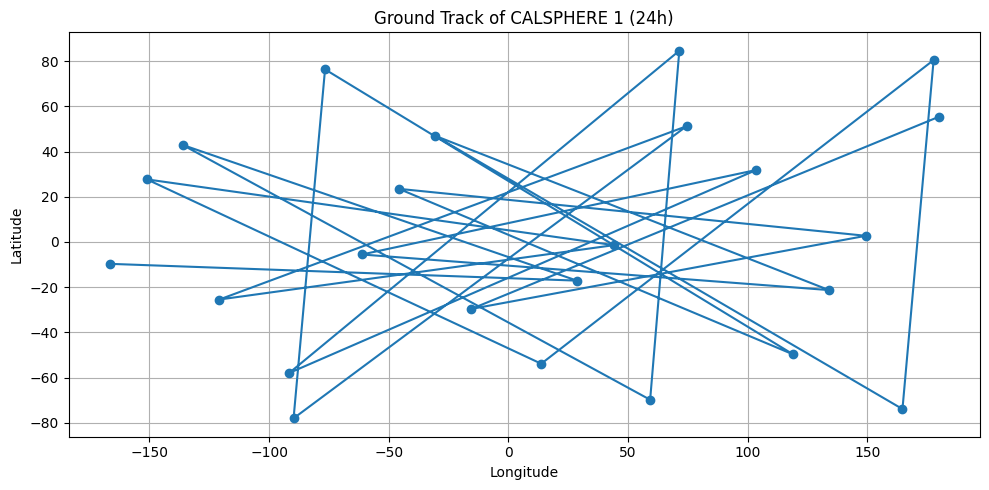

In [1]:
# ------------------------------
# Day-3: Orbit Propagation
# ------------------------------

from skyfield.api import load
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure outputs folder exists
os.makedirs("../outputs", exist_ok=True)

# ------------------------------
# Load Satellites
# ------------------------------
tle_path = "../data/satellites_active.tle"   # adjust path since we are inside notebooks/
stations = load.tle_file(tle_path)
print(f"✅ Loaded {len(stations)} satellites")

# Pick a satellite (e.g., first in file)
satellite = stations[0]
print("🛰️ Selected Satellite:", satellite)

# ------------------------------
# Propagate Orbit (next 24 hours)
# ------------------------------
ts = load.timescale()
start = datetime.utcnow()

positions = []
for i in range(0, 24):
    t = ts.utc(start.year, start.month, start.day, start.hour + i)
    geocentric = satellite.at(t)
    subpoint = geocentric.subpoint()
    positions.append({
        "Hour": i,
        "Latitude": subpoint.latitude.degrees,
        "Longitude": subpoint.longitude.degrees,
        "Altitude_km": subpoint.elevation.km
    })

df = pd.DataFrame(positions)
print(df.head())

# ------------------------------
# Plot ground track
# ------------------------------
plt.figure(figsize=(10,5))
plt.plot(df["Longitude"], df["Latitude"], marker="o")
plt.title(f"Ground Track of {satellite.name} (24h)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/groundtrack_24h.png")
plt.show()


🛰️ Top 5 Satellites by Epoch:
                Name                            Epoch
70       XMM-NEWTON 2025-09-28 01:55:50.355530+00:00
65              CXO 2025-09-26 22:17:36.312866+00:00
405        SJ-11-03 2025-09-26 08:38:49.259918+00:00
7720   SITRO-AIS 27 2025-09-26 08:38:16.306091+00:00
1124  YAOGAN-31 01C 2025-09-26 08:37:05.795013+00:00


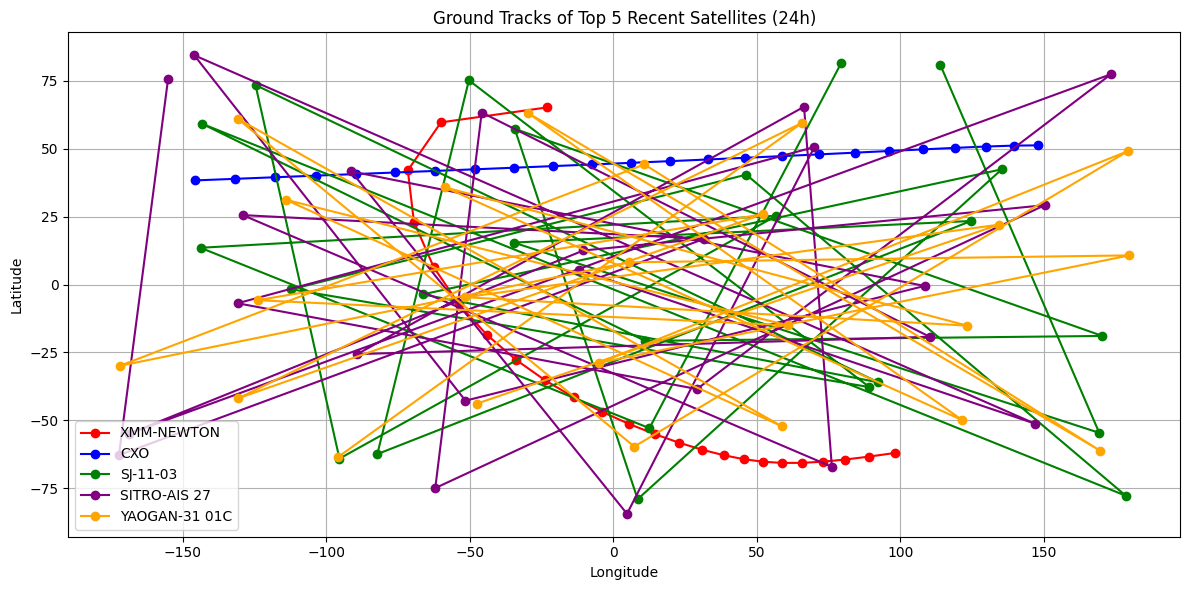

In [ ]:
# ------------------------------
# Extended: Multiple Satellites (Top 5 Recent)
# ------------------------------

# Create groundtracks folder if not exists
os.makedirs("../outputs/groundtracks", exist_ok=True)

# Pick top 5 satellites by latest epoch
df_meta = pd.DataFrame({
    "Name": [sat.name for sat in stations],
    "Epoch": [sat.epoch.utc_datetime() for sat in stations]
})
top5 = df_meta.sort_values("Epoch", ascending=False).head(5)
print("🛰️ Top 5 Satellites by Epoch:\n", top5)

colors = ["red", "blue", "green", "purple", "orange"]

plt.figure(figsize=(12,6))
for idx, row in enumerate(top5.itertuples()):
    sat = [s for s in stations if s.name == row.Name][0]
    
    positions = []
    for i in range(0, 24):
        t = ts.utc(start.year, start.month, start.day, start.hour + i)
        geocentric = sat.at(t)
        subpoint = geocentric.subpoint()
        positions.append({
            "Hour": i,
            "Latitude": subpoint.latitude.degrees,
            "Longitude": subpoint.longitude.degrees,
        })
    
    df_sat = pd.DataFrame(positions)
    
    # Save each satellite’s ground track separately
    plt.plot(df_sat["Longitude"], df_sat["Latitude"], 
    marker="o", color=colors[idx], label=row.Name)
    df_sat.to_csv(f"../outputs/groundtracks/{row.Name}_track.csv", index=False)

plt.title("Ground Tracks of Top 5 Recent Satellites (24h)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/groundtracks/top5_groundtracks.png")
plt.show()
